In [1]:
import numpy as np 
import pandas as pd 
from numpy.linalg import eig
import datetime
import matplotlib.pyplot as plt

# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans

In [2]:
import os
# cwd=os.getcwd()
# print(cwd)
os.listdir('/kaggle/input')


['us-election-2020-tweets', 'individual-tweets', 'trump-tweets']

In [3]:
# hashtag_trump = pd.read_csv("/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv",engine ="python")
# hashtag_biden = pd.read_csv("/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv",engine ="python")
biden_tweets = pd.read_csv("/kaggle/input/individual-tweets/tweets_of_joe_biden.csv",engine ="python")
trump_tweets = pd.read_json("/kaggle/input/trump-tweets/trump-tweets.json")



In [4]:
trump= trump_tweets.copy()


In [5]:
trump_deleted = pd.read_json("/kaggle/input/trump-tweets/trump_deleted.json")
trump_deleted
status = list()
id_deleted = list(trump_deleted['id'])
print(id_deleted)
for ids in trump['id']:
    if(ids in id_deleted):
        status.insert(ids,"Deleted")
    else:
        status.insert(ids,"Normal")
status
trump['status'] = status
trump


[1325090748035985408, 1325086590197174272, 1325084492076347392, 1324445863083708416, 1324012948965261312, 1323863787825438720, 1323714481353068544, 1323692146147340288, 1321965155509391360, 1321195996605394944, 1320226451166253056, 1319494198039441408, 1317497136523759616, 1317058851003420672, 1316711680919908352, 1316594633548484608, 1316579572603904000, 1316250377415790592, 1316223657908240384, 1315964956601446400, 1315872126327500800, 1315871989907755008, 1315871867899645952, 1315871590685564928, 1315871589129498624, 1315868183459508224, 1315836801354027008, 1315286705696579584, 1314278414359113728, 1313852035087953920]


,date,favorites,id,isRetweet,retweets,text,status
0,2020-11-07 21:54:48,978022,1325195021339987968,False,157628,"71,000,000 Legal Votes. The most EVER for a si...",Normal
1,2020-11-07 21:53:34,683888,1325194709443080192,False,128595,THE OBSERVERS WERE NOT ALLOWED INTO THE COUNTI...,Normal
2,2020-11-07 15:36:36,1188311,1325099845045071872,False,190721,"I WON THIS ELECTION, BY A LOT!",Normal
3,2020-11-07 15:23:00,295359,1325096422799237120,False,78384,Georgia Counties Using Same Software as Michig...,Normal
4,2020-11-07 15:00:27,27097,1325090748035985408,False,6569,Lawyer’s Press Conference at Four Season’s Lan...,Deleted
...,...,...,...,...,...,...,...
1545,2020-10-07 00:29:24,0,1313637515065204736,True,12897,RT @paulsperry_: BREAKING: An FBI investigator...,Normal
1546,2020-10-07 00:29:06,0,1313637441006383104,True,12288,RT @paulsperry_: BREAKING: Records show Obama'...,Normal
1547,2020-10-06 23:59:57,89191,1313630105831383040,False,20366,Republicans need to get smart and confirm Nate...,Normal
1548,2020-10-06 23:36:46,182368,1313624267842560000,False,46938,Crazy Nancy Pelosi and the Radical Left Democr...,Normal


In [6]:
#We now need to convert all the "favorites" into integers as some are integers and some strings. Pandas might automaticall do this for us
trump = trump.astype({'favorites': 'int'})
trump = trump.astype({'retweets': 'int'})
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1550 non-null   datetime64[ns]
 1   favorites  1550 non-null   int64         
 2   id         1550 non-null   int64         
 3   isRetweet  1550 non-null   bool          
 4   retweets   1550 non-null   int64         
 5   text       1550 non-null   object        
 6   status     1550 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(3), object(2)
memory usage: 74.3+ KB


In [7]:

# Here we have created a trump data set which displays all the deleted tweets. We do this by cross correlating trumps deleted tweets with the list of all his tweets
#The retweets have 0 favourites (which are basically likes) and have an RT at the front 
# To distinquish between the tweets trump deleted and the tweets deleted by twitter (restricted), we make the assumption that whenever a tweet is deleted by twitter the 
# like and retweet numbers are set to 0. We use this to distrinquish 

new_status = list()
for index,val in enumerate(trump['status']):
    list_fav = list(trump['favorites'])
    list_retweets = list(trump['retweets'])
    if(val=="Normal" and list_fav[index]==0 and list_retweets[index] == 0):
        new_status.insert(index, "Restricted")
    else:
        new_status.insert(index,val)
trump['status'] = new_status
trump[trump['status'] == "Deleted"]

            

,date,favorites,id,isRetweet,retweets,text,status
4,2020-11-07 15:00:27,27097,1325090748035985408,False,6569,Lawyer’s Press Conference at Four Season’s Lan...,Deleted
6,2020-11-07 14:43:56,779,1325086590197174272,False,168,Four Season’s Landscaping! https://t.co/kZ6xTF...,Deleted
7,2020-11-07 14:35:36,25919,1325084492076347392,False,7246,"Lawyers Press Conference at Four Seasons, Phil...",Deleted
47,2020-11-05 20:17:55,0,1324445863083708416,True,0,RT @EricTrump: 🚨🚨🚨 The amount of FRAUD being r...,Deleted
66,2020-11-04 15:37:40,0,1324012948965261312,True,0,RT @MattMackowiak: An update gives Biden 100% ...,Deleted
73,2020-11-04 05:44:57,37660,1323863787825438720,False,9797,"We are up BIG, but they are trying to STEAL th...",Deleted
77,2020-11-03 19:51:40,0,1323714481353068544,True,129232,RT @realDonaldTrump: VOTE! VOTE! VOTE!\nhttps:...,Deleted
83,2020-11-03 18:22:55,0,1323692146147340288,True,120074,RT @realDonaldTrump: VOTE! VOTE! VOTE!\nhttps:...,Deleted
391,2020-10-30 00:00:28,41,1321965155509391360,False,6,The Fake News refuses to cover the fact that G...,Deleted
473,2020-10-27 21:04:06,0,1321195996605394944,True,14407,RT @realDonaldTrump: https://t.co/gsFSghkmdM h...,Deleted


The trump data now has a status column which says if the tweet if the tweet is "normal", "Resitrcited" or "deleted".We have also converted all the 'favorites' and the 'retweets' into integers. 

In [8]:
trump.insert(1, 'time', pd.to_datetime(trump['date']).dt.time)
trump.insert(1, 'day', pd.to_datetime(trump['date']).dt.date)
trump = trump[trump['day']>=datetime.date(2020,10,7)]
trump

,date,day,time,favorites,id,isRetweet,retweets,text,status
0,2020-11-07 21:54:48,2020-11-07,21:54:48,978022,1325195021339987968,False,157628,"71,000,000 Legal Votes. The most EVER for a si...",Normal
1,2020-11-07 21:53:34,2020-11-07,21:53:34,683888,1325194709443080192,False,128595,THE OBSERVERS WERE NOT ALLOWED INTO THE COUNTI...,Normal
2,2020-11-07 15:36:36,2020-11-07,15:36:36,1188311,1325099845045071872,False,190721,"I WON THIS ELECTION, BY A LOT!",Normal
3,2020-11-07 15:23:00,2020-11-07,15:23:00,295359,1325096422799237120,False,78384,Georgia Counties Using Same Software as Michig...,Normal
4,2020-11-07 15:00:27,2020-11-07,15:00:27,27097,1325090748035985408,False,6569,Lawyer’s Press Conference at Four Season’s Lan...,Deleted
...,...,...,...,...,...,...,...,...,...
1542,2020-10-07 00:31:06,2020-10-07,00:31:06,0,1313637944574566400,True,22213,RT @paulsperry_: BREAKING: New agent 302s reve...,Normal
1543,2020-10-07 00:30:30,2020-10-07,00:30:30,0,1313637790454820864,True,11746,RT @paulsperry_: BREAKING: According to 302 in...,Normal
1544,2020-10-07 00:30:04,2020-10-07,00:30:04,0,1313637684011773952,True,18723,"RT @paulsperry_: BREAKING: FBI Agent Barnett, ...",Normal
1545,2020-10-07 00:29:24,2020-10-07,00:29:24,0,1313637515065204736,True,12897,RT @paulsperry_: BREAKING: An FBI investigator...,Normal


In [9]:
#We now rename the columns of the trump to match the Biden data below
trump.rename(columns={'date': 'tweet_date', 'day': 'tweet_day', 'time': 'tweet_time', 'favorites':'tweet_like_count','id':'tweet_id', 'retweets':'tweet_retweet_count', 'text':'tweet_content'}, inplace=True)
trump

,tweet_date,tweet_day,tweet_time,tweet_like_count,tweet_id,isRetweet,tweet_retweet_count,tweet_content,status
0,2020-11-07 21:54:48,2020-11-07,21:54:48,978022,1325195021339987968,False,157628,"71,000,000 Legal Votes. The most EVER for a si...",Normal
1,2020-11-07 21:53:34,2020-11-07,21:53:34,683888,1325194709443080192,False,128595,THE OBSERVERS WERE NOT ALLOWED INTO THE COUNTI...,Normal
2,2020-11-07 15:36:36,2020-11-07,15:36:36,1188311,1325099845045071872,False,190721,"I WON THIS ELECTION, BY A LOT!",Normal
3,2020-11-07 15:23:00,2020-11-07,15:23:00,295359,1325096422799237120,False,78384,Georgia Counties Using Same Software as Michig...,Normal
4,2020-11-07 15:00:27,2020-11-07,15:00:27,27097,1325090748035985408,False,6569,Lawyer’s Press Conference at Four Season’s Lan...,Deleted
...,...,...,...,...,...,...,...,...,...
1542,2020-10-07 00:31:06,2020-10-07,00:31:06,0,1313637944574566400,True,22213,RT @paulsperry_: BREAKING: New agent 302s reve...,Normal
1543,2020-10-07 00:30:30,2020-10-07,00:30:30,0,1313637790454820864,True,11746,RT @paulsperry_: BREAKING: According to 302 in...,Normal
1544,2020-10-07 00:30:04,2020-10-07,00:30:04,0,1313637684011773952,True,18723,"RT @paulsperry_: BREAKING: FBI Agent Barnett, ...",Normal
1545,2020-10-07 00:29:24,2020-10-07,00:29:24,0,1313637515065204736,True,12897,RT @paulsperry_: BREAKING: An FBI investigator...,Normal


In [10]:
biden_tweets

,username,tweet_id,tweet_url,tweet_date,tweet_content,tweet_retweet_count,tweet_quote_count,tweet_reply_count,tweet_like_count
0,POTUS,1477022943586754560,https://twitter.com/POTUS/status/1477022943586...,2021-12-31 21:04:46+00:00,Betty White brought a smile to the lips of gen...,18567,906,2906,194017
1,POTUS,1476998740833705984,https://twitter.com/POTUS/status/1476998740833...,2021-12-31 19:28:35+00:00,"As we head into 2022, I want folks to remember...",2846,443,2606,16213
2,JoeBiden,1476618089273905158,https://twitter.com/JoeBiden/status/1476618089...,2021-12-30 18:16:01+00:00,This new sinister combination of voter suppres...,9256,716,4097,45657
3,POTUS,1476596766409736195,https://twitter.com/POTUS/status/1476596766409...,2021-12-30 16:51:17+00:00,"When I came into office, our economy was in cr...",9386,2262,14079,67757
4,POTUS,1476579613799337987,https://twitter.com/POTUS/status/1476579613799...,2021-12-30 15:43:08+00:00,"Last year at this time, there were 823,000 Ame...",5639,1071,5085,36613
...,...,...,...,...,...,...,...,...,...
9042,JoeBiden,189339650610036736,https://twitter.com/JoeBiden/status/1893396506...,2012-04-09 13:11:05+00:00,News for you this morning: VP Biden will speak...,52,1,57,16
9043,JoeBiden,189287350034104320,https://twitter.com/JoeBiden/status/1892873500...,2012-04-09 09:43:15+00:00,Campaign staff will run this account to keep y...,57,68,284,45
9044,JoeBiden,189287227321356289,https://twitter.com/JoeBiden/status/1892872273...,2012-04-09 09:42:46+00:00,We're excited to announce that @JoeBiden is be...,80,9,23,24
9045,JoeBiden,543984392,https://twitter.com/JoeBiden/status/543984392,2007-12-29 15:35:26+00:00,"Iowans, there's a good chance there's a Biden ...",36,113,135,124


In [11]:
print(biden_tweets.info())
biden = biden_tweets.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9047 entries, 0 to 9046
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   username             9047 non-null   object
 1   tweet_id             9047 non-null   int64 
 2   tweet_url            9047 non-null   object
 3   tweet_date           9047 non-null   object
 4   tweet_content        9047 non-null   object
 5   tweet_retweet_count  9047 non-null   int64 
 6   tweet_quote_count    9047 non-null   int64 
 7   tweet_reply_count    9047 non-null   int64 
 8   tweet_like_count     9047 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 636.2+ KB
None


In [12]:
#splitting the datetime column to so it splits into two columns- Date and Time (create new column after date for time, and replace old datetime column with just date)

biden.insert(4, 'tweet_time', pd.to_datetime(biden['tweet_date']).dt.time)
biden.insert(4, 'tweet_day', pd.to_datetime(biden['tweet_date']).dt.date)
#drop the tweet_url
biden = biden.drop(columns=['tweet_url'])
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9047 entries, 0 to 9046
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   username             9047 non-null   object
 1   tweet_id             9047 non-null   int64 
 2   tweet_date           9047 non-null   object
 3   tweet_day            9047 non-null   object
 4   tweet_time           9047 non-null   object
 5   tweet_content        9047 non-null   object
 6   tweet_retweet_count  9047 non-null   int64 
 7   tweet_quote_count    9047 non-null   int64 
 8   tweet_reply_count    9047 non-null   int64 
 9   tweet_like_count     9047 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 706.9+ KB


In [13]:
#restricting date for Joe Biden's tweets to be between Oct 07 2020 and Nov 07 2020
biden = biden[(biden['tweet_day']>=datetime.date(2020,10,7)) & (biden['tweet_day']<=datetime.date(2020,11,7))]
biden

,username,tweet_id,tweet_date,tweet_day,tweet_time,tweet_content,tweet_retweet_count,tweet_quote_count,tweet_reply_count,tweet_like_count
2861,JoeBiden,1325118992785223682,2020-11-07 16:52:42+00:00,2020-11-07,16:52:42,"America, I’m honored that you have chosen me t...",576072,147851,212779,3186650
2862,JoeBiden,1324926298762870785,2020-11-07 04:07:00+00:00,2020-11-07,04:07:00,We may be opponents — but we are not enemies. ...,69138,16378,27400,1032046
2863,JoeBiden,1324925795991609348,2020-11-07 04:05:00+00:00,2020-11-07,04:05:00,We have to remember the purpose of our politic...,16607,3002,9800,350044
2864,JoeBiden,1324925040660393987,2020-11-07 04:02:00+00:00,2020-11-07,04:02:00,I know tensions can be high after a tough elec...,17081,2409,8633,356811
2865,JoeBiden,1324924538749026306,2020-11-07 04:00:00+00:00,2020-11-07,04:00:00,We are going to be the first Democrats to win ...,20796,2442,5512,324114
...,...,...,...,...,...,...,...,...,...,...
3462,JoeBiden,1313663334286323714,2020-10-07 02:12:00+00:00,2020-10-07,02:12:00,Please. https://t.co/acHR1Rf8hE,23439,6481,11101,177744
3463,JoeBiden,1313652765319557122,2020-10-07 01:30:00+00:00,2020-10-07,01:30:00,I can’t wait for @KamalaHarris to make history...,3752,192,1915,25759
3464,JoeBiden,1313646473393840128,2020-10-07 01:05:00+00:00,2020-10-07,01:05:00,"Ignore the polls, folks. There’s too much at s...",25575,1714,3779,117089
3465,JoeBiden,1313641691602202624,2020-10-07 00:46:00+00:00,2020-10-07,00:46:00,Think about what it takes for a Black person t...,10190,864,2654,50420


In [14]:
#check that the tweets came from the same account- Joe Biden
biden["username"].unique()

array(['JoeBiden'], dtype=object)

In [15]:
#We now reindex the biden data set to start from 0
biden = biden.sort_values(by=['tweet_date'], ascending=True)
biden.reset_index()

,index,username,tweet_id,tweet_date,tweet_day,tweet_time,tweet_content,tweet_retweet_count,tweet_quote_count,tweet_reply_count,tweet_like_count
0,3466,JoeBiden,1313633890289045504,2020-10-07 00:15:00+00:00,2020-10-07,00:15:00,"Look, folks, I'm going to be honest: we'll try...",3726,451,2005,18567
1,3465,JoeBiden,1313641691602202624,2020-10-07 00:46:00+00:00,2020-10-07,00:46:00,Think about what it takes for a Black person t...,10190,864,2654,50420
2,3464,JoeBiden,1313646473393840128,2020-10-07 01:05:00+00:00,2020-10-07,01:05:00,"Ignore the polls, folks. There’s too much at s...",25575,1714,3779,117089
3,3463,JoeBiden,1313652765319557122,2020-10-07 01:30:00+00:00,2020-10-07,01:30:00,I can’t wait for @KamalaHarris to make history...,3752,192,1915,25759
4,3462,JoeBiden,1313663334286323714,2020-10-07 02:12:00+00:00,2020-10-07,02:12:00,Please. https://t.co/acHR1Rf8hE,23439,6481,11101,177744
...,...,...,...,...,...,...,...,...,...,...,...
601,2865,JoeBiden,1324924538749026306,2020-11-07 04:00:00+00:00,2020-11-07,04:00:00,We are going to be the first Democrats to win ...,20796,2442,5512,324114
602,2864,JoeBiden,1324925040660393987,2020-11-07 04:02:00+00:00,2020-11-07,04:02:00,I know tensions can be high after a tough elec...,17081,2409,8633,356811
603,2863,JoeBiden,1324925795991609348,2020-11-07 04:05:00+00:00,2020-11-07,04:05:00,We have to remember the purpose of our politic...,16607,3002,9800,350044
604,2862,JoeBiden,1324926298762870785,2020-11-07 04:07:00+00:00,2020-11-07,04:07:00,We may be opponents — but we are not enemies. ...,69138,16378,27400,1032046


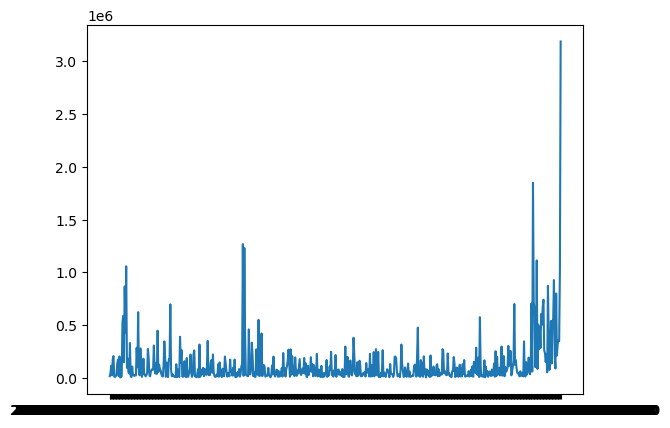

In [16]:
#test graph- by Richa :)
plt.plot(biden["tweet_date"], biden["tweet_like_count"])